<a href="https://colab.research.google.com/github/sallyMo14/Anomoly-detection/blob/main/Anomoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load The Data

In [ ]:
path="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Week17/Data/credit_card.csv"
df=pd.read_csv(path)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#Explore The Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

In [ ]:
df.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#Kmean clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.000000,4.618528e-18,4.263256e-18,-1.136868e-17,1.278977e-17,-1.563194e-17,2.842171e-18,7.105427e-19,2.273737e-17,2.273737e-17,...,8.526513e-18,-1.421085e-18,0.000000,-1.136868e-17,0.000000,1.918465e-17,2.273737e-17,2.842171e-18,-1.243450e-17,2.664535e-18
std,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-18.006687,-2.654351e+01,-1.411218e+01,-3.466114e+00,-2.729091e+01,-1.817718e+01,-2.455962e+01,-1.877204e+01,-6.124311e+00,-1.180159e+01,...,-2.235822e+01,-1.257202e+01,-13.244909,-3.085679e+01,-4.273688,-6.182844e+00,-2.599772e+00,-1.971446e+01,-1.310692e+01,-3.483590e-01
25%,-0.507861,-3.784986e-01,-4.253777e-01,-6.165018e-01,-4.985775e-01,-5.796205e-01,-4.337502e-01,-1.008889e-01,-6.342085e-01,-4.229124e-01,...,-3.032860e-01,-2.353380e-01,-0.628531,-2.905271e-01,-0.586666,-5.774739e-01,-7.788192e-01,-2.242983e-01,-6.975227e-02,-3.193112e-01
50%,-0.085099,6.782439e-03,2.986867e-02,-3.808745e-02,-8.175830e-02,-2.152805e-01,1.484037e-02,6.157779e-02,3.294826e-03,-1.062683e-01,...,-8.676946e-02,-7.803955e-02,0.020153,-2.883205e-02,0.103214,7.637644e-02,-1.192856e-01,-2.757235e-02,5.005397e-02,-2.622415e-01
75%,0.919997,4.796908e-01,5.950950e-01,5.941939e-01,3.578826e-01,2.849753e-01,5.010253e-01,2.629713e-01,6.045470e-01,3.585611e-01,...,2.186046e-01,9.824494e-02,0.627215,2.339274e-01,0.659588,6.376485e-01,6.476346e-01,2.763214e-01,2.820298e-01,-6.125551e-02
max,1.454644,6.354564e+00,2.735690e+00,7.126675e+00,2.910371e+01,1.637432e+01,3.187847e+01,4.083320e+00,8.215687e+00,1.135921e+01,...,1.341121e+01,2.495048e+01,7.426276,2.839192e+01,5.377278,1.262788e+01,6.132634e+00,2.036787e+01,1.812750e+01,4.129275e+01


In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df_clustered = df.copy()
df_clustered['cluster'] = kmeans.predict(df_scaled)
df_clustered.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')

In [ ]:
# Distances shape is (# rows, # clusters)
distances.shape

(10000, 3)

In [ ]:
# Compare to X (#rows, # features)
df_scaled.shape

(10000, 29)

In [ ]:
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)


,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,2.804682,4.393264,5.857215
1,2.426430,3.686087,5.075081
2,6.542622,7.337378,8.656002


In [ ]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)

In [ ]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 99.6)
threshold

np.float64(20.909887868001256)

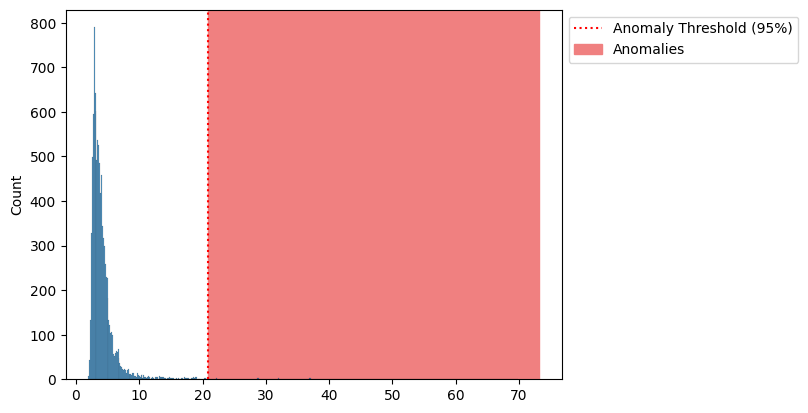

In [ ]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:

filter_anomalies = min_distances > threshold

filter_anomalies.sum()


np.int64(40)

In [ ]:
# Getting the row indices of the anomalies
idx_anomalies = df_scaled[filter_anomalies].index
idx_anomalies

Index([ 159, 1376, 1619, 2156, 2212, 2439, 2594, 2654, 2756, 2911, 2914, 2917,
       2923, 3443, 4779, 5303, 5412, 5413, 5529, 5674, 5704, 5764, 6489, 6643,
       6672, 7322, 7338, 7470, 7596, 7597, 8124, 8163, 8437, 8442, 8856, 8939,
       8999, 9071, 9304, 9326],
      dtype='int64')

In [ ]:
df.iloc[idx_anomalies]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04
1376,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,-1.004398,...,-2.203676,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03
1619,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,...,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43
2156,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,-1.854230,...,7.314347,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00
2212,-5.149638,4.261740,-1.043112,-2.872586,-0.970562,2.037714,-4.472909,-14.892657,1.713550,0.090612,...,-3.235393,14.718212,-4.432106,2.075999,-0.025098,0.042432,-0.045874,0.619351,0.287509,4.00
2439,-12.168192,-15.732974,-0.376474,3.792613,10.658654,-7.465603,-6.907038,1.573722,0.058164,-0.421881,...,4.469095,1.660209,-0.910516,0.010468,-0.097246,-0.329918,0.225916,0.201802,-2.368534,120.00
2594,-2.574940,-2.669331,-3.080133,2.043551,-11.416881,7.885721,12.219249,-1.828209,-1.475925,-1.965803,...,0.828357,-0.115580,0.264090,2.219739,-0.771131,0.145438,-0.240517,1.180441,-0.623651,2909.97
2654,-7.546256,3.051033,-0.524684,1.005228,0.040486,2.751676,-6.267406,-19.176657,1.049976,0.521925,...,-3.785808,9.639417,-3.053597,2.648404,0.429294,0.300704,-0.273082,1.300662,-0.641413,29.90
2756,-10.780565,-9.940571,1.703409,3.094958,7.929119,-4.032777,-8.945496,-5.099389,2.297646,-0.234243,...,-4.829446,-4.399837,1.633000,-0.711629,0.645921,-0.549247,0.704801,3.372603,-1.307732,85.00
2911,-4.344234,4.268511,-1.580163,0.272536,-1.419244,2.603639,-11.164794,-23.632502,-1.849347,-5.217814,...,5.851381,-11.273890,3.661957,-0.200435,0.920605,0.619883,-0.381170,-0.132891,0.539894,1.00


# visulize clusters

* Since there is 29 features , clusters could not be visualiza , so we will use pca to do dimentionality reduction into 2 PCAs

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

NameError: name 'df_scaled' is not defined

In [ ]:
scaler=StandardScaler()
df_pca_scaled=scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_pca_scaled, columns=df_pca.columns)
df_scaled.head()

,PCA1,PCA2
0,1.277908,0.358230
1,0.942908,-0.410716
2,1.403975,1.588727
3,1.368276,0.209485
4,1.350678,-0.078947


In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(df_pca_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df_pca_clustered = df_pca.copy()
df_pca_clustered = pd.DataFrame(df_pca_clustered, columns=df_pca.columns)
df_pca_clustered.head()

,PCA1,PCA2
0,1.277908,0.358230
1,0.942908,-0.410716
2,1.403975,1.588727
3,1.368276,0.209485
4,1.350678,-0.078947


In [ ]:

df_pca_clustered['cluster'] = kmeans.predict(df_pca_scaled)
df_pca_clustered.head()

,PCA1,PCA2,cluster
0,1.277908,0.358230,0
1,0.942908,-0.410716,0
2,1.403975,1.588727,0
3,1.368276,0.209485,0
4,1.350678,-0.078947,0


In [ ]:
# Saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
cluster_centers

,PCA1,PCA2
0,1.204744,-0.172928
1,-0.777829,-0.012785
2,0.480099,6.518481


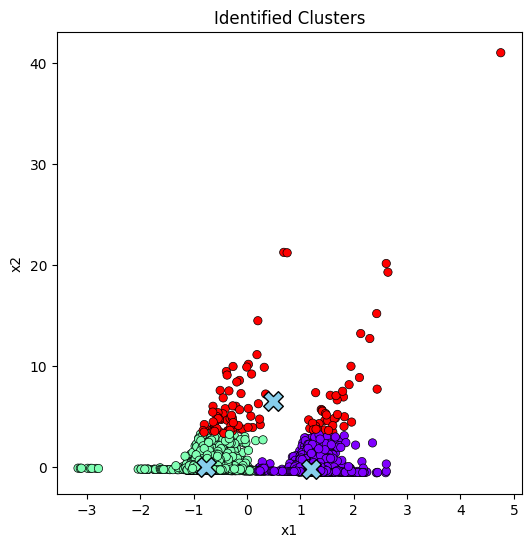

In [ ]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_pca_clustered["PCA1"], df_pca_clustered["PCA2"], c=df_pca_clustered["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
# Plot the cluster centers
centers = ax.scatter(
    cluster_centers["PCA1"],
    cluster_centers["PCA2"],
    color="skyblue",
    ec="black",
    s=200,
    marker="X",
);